In [1]:
from Precise import Precise
from boruta_analysis import BorutaAnalyzer
from shap_analysis import SHAPVisualizer
from reinforcement_learning import ReinforcementLearningAnalyzer
from xgboost_analysis import PredictionAnalyzer
from xgb_estimator import XGBEstimator
import anndata as ad
import scanpy as sc
import random



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


#### Importing the data and Initializing a Precise object

In [2]:
adata = ad.read_h5ad("../examples/sample_melanoma_adata.h5ad")
adata.obs['sample'] = adata.obs['sample_name']
## Continue with preprocessing adata...
output_dir = "../results/"


In [3]:
adata

AnnData object with n_obs × n_vars = 1200 × 10082
    obs: 'ID', 'patient_number', 'time', 'sample_number', 'sample_name', 'response', 'cluster', 'T cells', 'CD4 helper T cells', 'CD8 Cytotoxic T cells', 'Regulatory T cells', 'Regulatory CD4 T cells', 'Regulatory CD8 T cells', 'Regulatory CD4 CD8 T cells', 'NKT cells', 'NK cells', 'B cells', 'Activated T cells', 'Senescence T cells', 'Terminal effector', 'Exhausted T cells', 'Stem like T cells', 'Memory T cells', 'Memory CD4 T cells', 'Memory CD8 T cells', 'Memory CD4 CD8 T cells', 'Macrophage immature', 'Macrophage mature', 'Monocyte immature', 'Monocyte mature', 'cDCs dendritic cells', 'pDCs', 'myeloid cells general immature', 'myeloid cells general mature', 'Neutrophils', 'Granolocytes', 'Double negative ', 'sample'
    uns: 'cell_types'

The anndata object needs to contain in the .obs dataframe a columns with a response columns and a sample name column. These need to match the names passed to Precise in target_columns, and sample_column
The resposne columns has to contains 0s and 1s or 'R' 'NR'.

In [4]:
precise = Precise(
    adata,
    output_dir=output_dir,
    target_column="response",  # Adjust based on your dataset
    sample_column="sample"
)

#### Running a leave-one-out prediction on the samples
This result in a score for each sample, and a total AUC score. Feature Ii

In [11]:
results, auc_score = precise.run_loo_prediction()

Starting LOO Prediction with 1200 cells and 10082 features.
Sample column: sample, Target column: response.
Processing sample: Post_P1 with 1175 train cells and 25 test cells.
Feature importances saved to ../results/importance_scores\Post_P1_feature_importance.csv.
Processing sample: Post_P1_2 with 1175 train cells and 25 test cells.
Feature importances saved to ../results/importance_scores\Post_P1_2_feature_importance.csv.
Processing sample: Post_P2 with 1175 train cells and 25 test cells.
Feature importances saved to ../results/importance_scores\Post_P2_feature_importance.csv.
Processing sample: Post_P3 with 1175 train cells and 25 test cells.
Feature importances saved to ../results/importance_scores\Post_P3_feature_importance.csv.
Processing sample: Post_P3_2 with 1175 train cells and 25 test cells.
Feature importances saved to ../results/importance_scores\Post_P3_2_feature_importance.csv.
Processing sample: Post_P4 with 1175 train cells and 25 test cells.
Feature importances saved 

Intersection plot saved to ../results/plots.


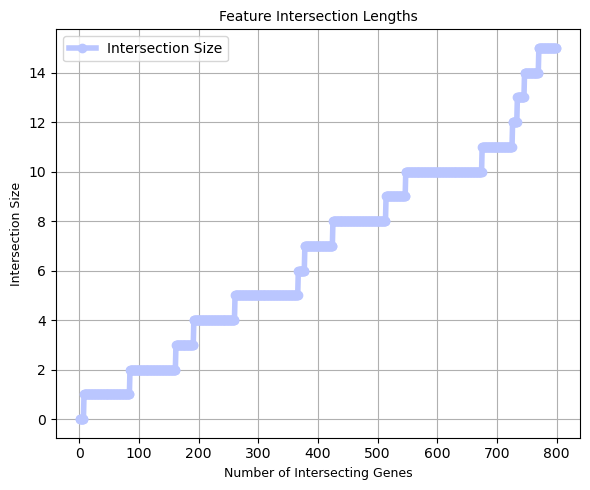

Feature importance bar plot saved to ../results/plots\all_cells_feature_importance_barplot.png.


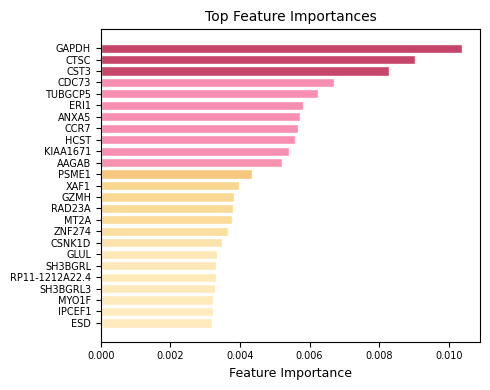

In [8]:
precise.create_feature_plots(800)

In [5]:
top_features = precise.choose_top_features(10)
top_features

['CTSC',
 'GAPDH',
 'SH3BGRL',
 'HLA-B',
 'TMSB10',
 'BCL2L1',
 'SLC38A1',
 'GZMH',
 'XAF1',
 'IFITM2']

## SHAP Values Analysis

#### Using SHAP for gene expression anlysis, and further identification of most important genes

SHAP mean absolute values, and SHAP summary plots



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



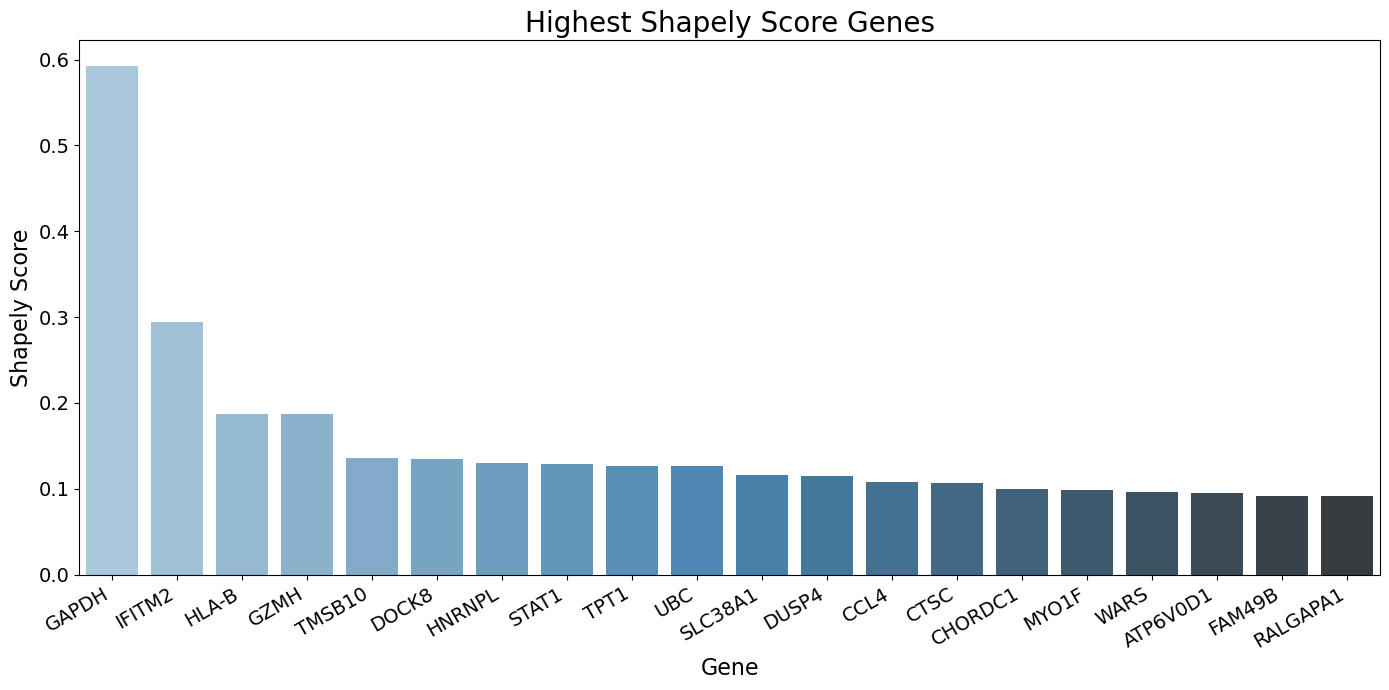

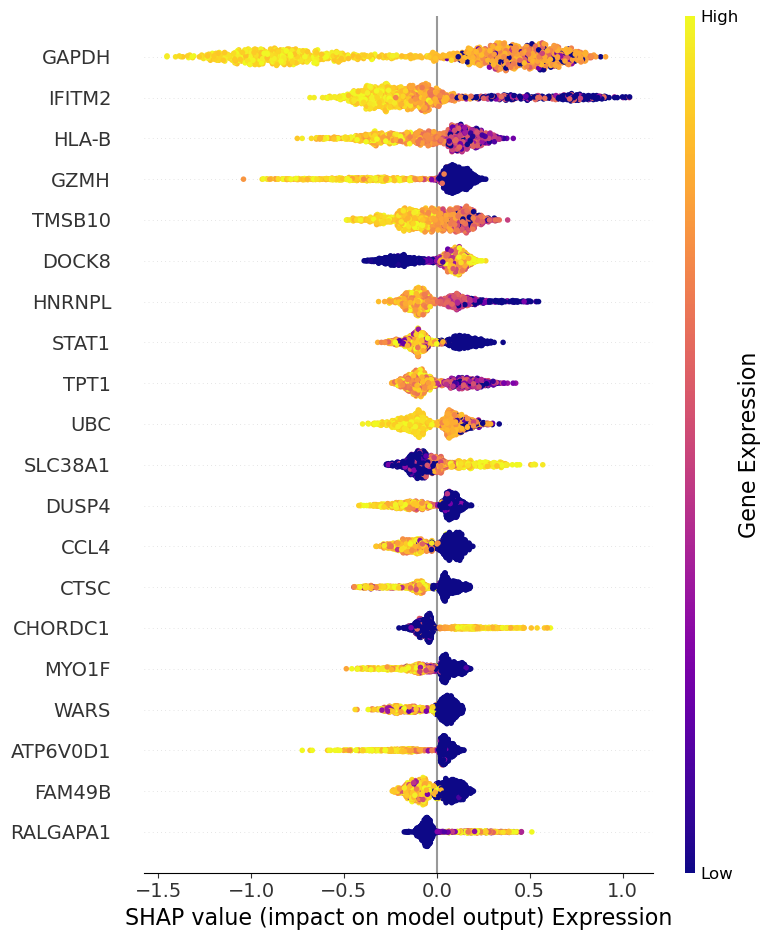

In [14]:
precise.run_shap_visualizations()

##### We can look at individual samples and interprete the model's prediction to them

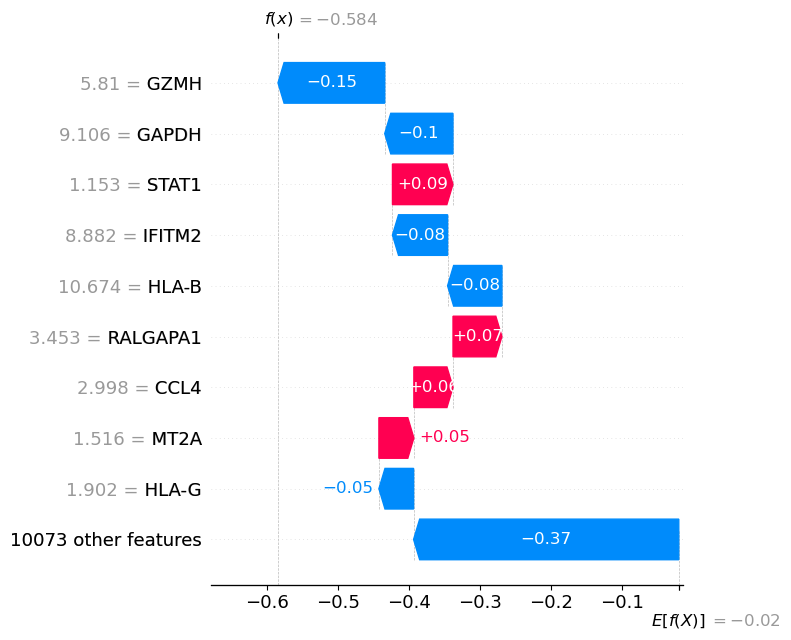

In [6]:
precise.shap_visualizer.shap_waterfall_plot('Pre_P3')

##### Using SHAP we can find gene-gene interactions for genes of interest

Dependence plot saved to ../results/plots/GAPDH_dependence.png


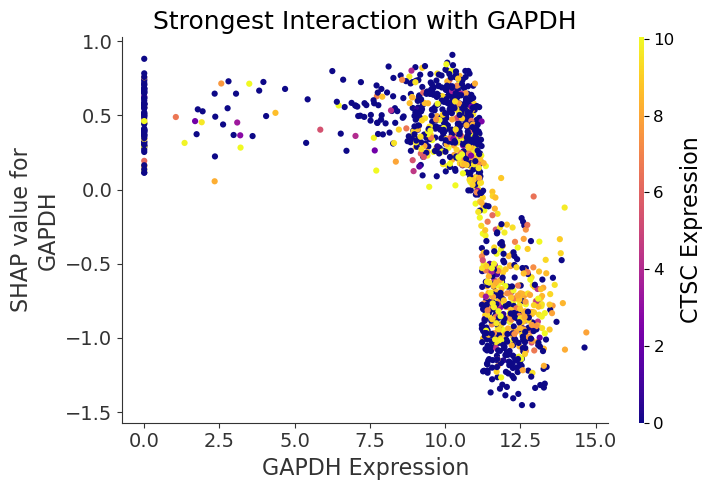

In [5]:
precise.shap_visualizer.shap_dependence_plot('GAPDH', save_path='../results/plots/GAPDH_dependence.png')

Subsetting the highly variable genes reduces the running time significantly. 
The RL class ignores this, as it uses a list of genes as input, but for boruta this is important. Note that this removes also informative genes.

In [5]:
precise.subset_highly_variable(2000)

Trying to modify attribute `.obs` of view, initializing view as actual.


AnnData object with n_obs × n_vars = 1200 × 2000
    obs: 'ID', 'patient_number', 'time', 'sample_number', 'sample_name', 'response', 'cluster', 'T cells', 'CD4 helper T cells', 'CD8 Cytotoxic T cells', 'Regulatory T cells', 'Regulatory CD4 T cells', 'Regulatory CD8 T cells', 'Regulatory CD4 CD8 T cells', 'NKT cells', 'NK cells', 'B cells', 'Activated T cells', 'Senescence T cells', 'Terminal effector', 'Exhausted T cells', 'Stem like T cells', 'Memory T cells', 'Memory CD4 T cells', 'Memory CD8 T cells', 'Memory CD4 CD8 T cells', 'Macrophage immature', 'Macrophage mature', 'Monocyte immature', 'Monocyte mature', 'cDCs dendritic cells', 'pDCs', 'myeloid cells general immature', 'myeloid cells general mature', 'Neutrophils', 'Granolocytes', 'Double negative ', 'sample'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_types', 'hvg'

## Boruta Feature Selection

In [7]:
boruta_results = precise.boruta_analyzer.run_boruta()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	2000
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	1985
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	14
Rejected: 	1985
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	14
Rejected: 	1985
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	14
Rejected: 	1985
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1992
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1992
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1992
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	7
Rejected: 	1992
Iteration: 	16 / 100
Confirmed

In [20]:
_, chosen_genes_dict, _ = boruta_results
chosen_genes_dict

{'confirmed': ['FCGR3A', 'TGFBI'], 'tentative': []}

#### Boruta can also be run directly through BorutaAnalyzer for prediction purposes

In [6]:
# Get the unique samples
samples = list(adata.obs['sample'].unique())

# Shuffle the samples to randomize
random.shuffle(samples)

# Split into 70% train and 30% test
split_idx = int(0.7 * len(samples))
train_samples = samples[:split_idx]

# Subset the AnnData object
train_adata = adata[adata.obs['sample'].isin(train_samples)]
test_adata = adata[~adata.obs['sample'].isin(train_samples)]

# Run Boruta analysis
boruta_analyzer = BorutaAnalyzer(train_adata, verbose=False)
boruta_results = boruta_analyzer.run_boruta(test_adata=test_adata)


Trying to modify attribute `.obs` of view, initializing view as actual.
Trying to modify attribute `.obs` of view, initializing view as actual.


In [7]:
boruta_results

(None,
 {'confirmed': ['PSME2', 'MT2A'], 'tentative': []},
 {'Post_P5': 0.52,
  'Post_P5_2': 0.64,
  'Post_P6': 0.16,
  'Post_P8': 0.52,
  'Post_P14': 0.4,
  'Post_P15': 0.48,
  'Post_P16': 0.28,
  'Post_P18': 0.4,
  'Post_P30': 0.36,
  'Pre_P1': 0.52,
  'Pre_P2': 0.48,
  'Pre_P6': 0.6,
  'Pre_P26': 0.6,
  'Pre_P27': 0.32,
  'Pre_P29': 0.56})

## Reinforcement Learning for Cell-Level Predictivity Scores

Passing a list of robust genes to RL is a must, as it reduces significantly the running time and when using a good gene subset (e.g. as extracted by LOO) it improves the distribution of predictive labels in the cohort.

In [15]:
# we can combine the features from boruta and the features from the LOO, and train the RL model using them
chosen_features = list(set(top_features + chosen_genes_dict['confirmed']))
rl_adata = precise.run_reinforcement_learning(chosen_features = top_features, n_iters = 50)

Starting RL iterations with 1200 cells and 10 features.
Iteration 1/50


Trying to modify attribute `.obs` of view, initializing view as actual.


Iteration 2/50
Iteration 3/50
Iteration 4/50
Iteration 5/50
Iteration 6/50
Iteration 7/50
Iteration 8/50
Iteration 9/50
Iteration 10/50
Iteration 11/50
Iteration 12/50
Iteration 13/50
Iteration 14/50
Iteration 15/50
Iteration 16/50
Iteration 17/50
Iteration 18/50
Iteration 19/50
Iteration 20/50
Iteration 21/50
Iteration 22/50
Iteration 23/50
Iteration 24/50
Iteration 25/50
Iteration 26/50
Iteration 27/50
Iteration 28/50
Iteration 29/50
Iteration 30/50
Iteration 31/50
Iteration 32/50
Iteration 33/50
Iteration 34/50
Iteration 35/50
Iteration 36/50
Iteration 37/50
Iteration 38/50
Iteration 39/50
Iteration 40/50
Iteration 41/50
Iteration 42/50
Iteration 43/50
Iteration 44/50
Iteration 45/50
Iteration 46/50
Iteration 47/50
Iteration 48/50
Iteration 49/50
Iteration 50/50
Results saved to ../results/


Plot saved at ../results/plots\rl_labels_hist_49.png


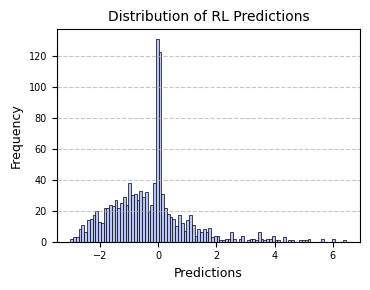

In [16]:
labels = precise.get_rl_distribution(49)
adata.obs['RL_labels'] = labels

In [17]:
sc.tl.tsne(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


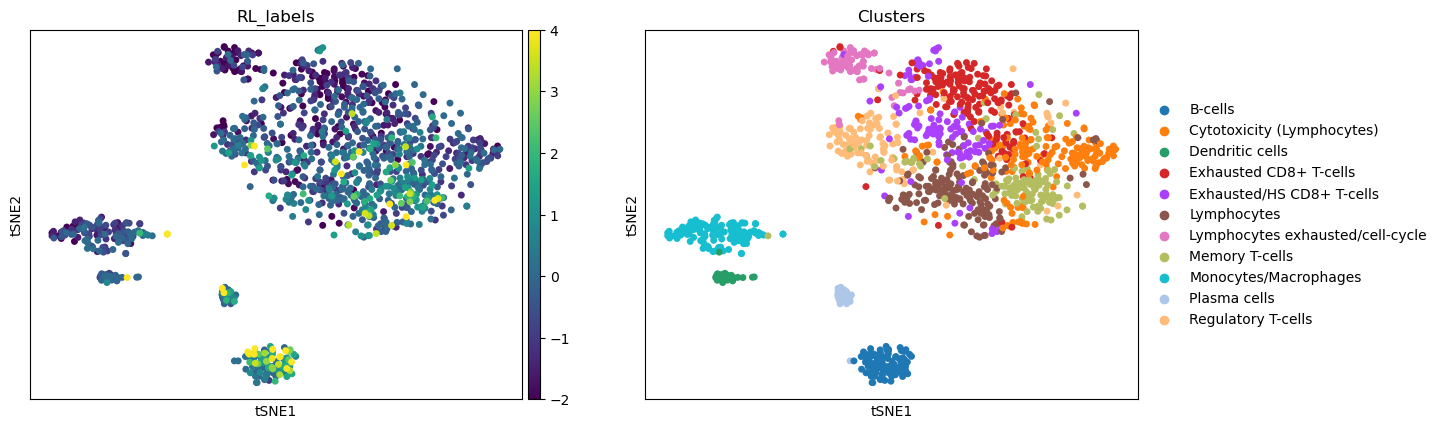

In [18]:
group_annotations = {
    "1": "B-cells",
    "2": "Plasma cells",
    "3": "Monocytes/Macrophages",
    "4": "Dendritic cells",
    "5": "Lymphocytes",
    "6": "Exhausted CD8+ T-cells",
    "7": "Regulatory T-cells",
    "8": "Cytotoxicity (Lymphocytes)",
    "9": "Exhausted/HS CD8+ T-cells",
    "10": "Memory T-cells",
    "11": "Lymphocytes exhausted/cell-cycle"
}

adata.obs['Clusters'] = [group_annotations[cluster] for cluster in adata.obs['cluster']]
sc.pl.tsne(adata, color=['RL_labels', 'Clusters'], vmax = 4, vmin = -2)
# sc.pl.tsne(adata, color='Clusters')

In [5]:
import numpy as np
import pandas as pd
import anndata as ad

def sample_cells(adata, sample_column, n=25):
    """
    Sample `n` cells from each unique sample in the `sample_column` of the `obs` dataframe.
    
    Parameters:
    - adata: AnnData object to sample from.
    - sample_column: Column in `adata.obs` that identifies the sample grouping.
    - n: Number of cells to sample from each group.

    Returns:
    - A new AnnData object with the sampled cells.
    """
    sampled_indices = []

    # Group cells by the `sample_column`
    grouped = adata.obs.groupby(sample_column)

    # Sample `n` cells from each group
    for sample, group in grouped:
        sampled_indices.extend(group.sample(min(len(group), n)).index)

    # Subset the AnnData object
    sampled_adata = adata[sampled_indices, :].copy()
    return sampled_adata

# Example Usage
adata = sc.read_h5ad('../../Melanoma/Adata/final_adata.h5ad')
# Assuming your AnnData object is called `adata` and the sample info is in `adata.obs['sample']`
sampled_adata = sample_cells(adata, sample_column='sample_name', n=25)
sampled_adata.obs['cluster'] = sampled_adata.obs['cluster'].astype(str)
sampled_adata.write('../examples/sample_melanoma_adata.h5ad')

In [18]:
model = PredictionAnalyzer(adata, 'T cells', 'response', 'sample')

In [27]:
predictions = model.simple_prediction(adata[adata.obs['sample'].isin(train_samples)], adata[adata.obs['sample'].isin(test_samples)])

Trying to modify attribute `.obs` of view, initializing view as actual.


Starting Simple Prediction.
Training on 1000 cells from 40 samples.
Predicting for 200 cells from 8 samples.


In [30]:
rl_analyzer = ReinforcementLearningAnalyzer(adata, celltype='T cells')
rl_analyzer.run_reinforcement_learning(n_iters=80, chosen_features=['LILRB4', 'FCER1G'],learning_rate=0.2)

Trying to modify attribute `.obs` of view, initializing view as actual.


Iteration 1/80
Iteration 2/80
Iteration 3/80
Iteration 4/80
Iteration 5/80
Iteration 6/80
Iteration 7/80
Iteration 8/80
Iteration 9/80
Iteration 10/80
Iteration 11/80
Iteration 12/80
Iteration 13/80
Iteration 14/80
Iteration 15/80
Iteration 16/80
Iteration 17/80
Iteration 18/80
Iteration 19/80
Iteration 20/80
Iteration 21/80
Iteration 22/80
Iteration 23/80
Iteration 24/80
Iteration 25/80
Iteration 26/80
Iteration 27/80
Iteration 28/80
Iteration 29/80
Iteration 30/80
Iteration 31/80
Iteration 32/80
Iteration 33/80
Iteration 34/80
Iteration 35/80
Iteration 36/80
Iteration 37/80
Iteration 38/80
Iteration 39/80
Iteration 40/80
Iteration 41/80
Iteration 42/80
Iteration 43/80
Iteration 44/80
Iteration 45/80
Iteration 46/80
Iteration 47/80
Iteration 48/80
Iteration 49/80
Iteration 50/80
Iteration 51/80
Iteration 52/80
Iteration 53/80
Iteration 54/80
Iteration 55/80
Iteration 56/80
Iteration 57/80
Iteration 58/80
Iteration 59/80
Iteration 60/80
Iteration 61/80
Iteration 62/80
Iteration 63/80
I

AnnData object with n_obs × n_vars = 797 × 2
    obs: 'ID', 'patient_number', 'time', 'sample_number', 'sample_name', 'response', 'cluster', 'T cells', 'CD4 helper T cells', 'CD8 Cytotoxic T cells', 'Regulatory T cells', 'Regulatory CD4 T cells', 'Regulatory CD8 T cells', 'Regulatory CD4 CD8 T cells', 'NKT cells', 'NK cells', 'B cells', 'Activated T cells', 'Senescence T cells', 'Terminal effector', 'Exhausted T cells', 'Stem like T cells', 'Memory T cells', 'Memory CD4 T cells', 'Memory CD8 T cells', 'Memory CD4 CD8 T cells', 'Macrophage immature', 'Macrophage mature', 'Monocyte immature', 'Monocyte mature', 'cDCs dendritic cells', 'pDCs', 'myeloid cells general immature', 'myeloid cells general mature', 'Neutrophils', 'Granolocytes', 'Double negative ', 'sample', 'RL_labels', 'labels', 'RL_cell_scores'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_types', 'hvg', 'tsne'
    obsm: 'X_pca', 'X_tsne'